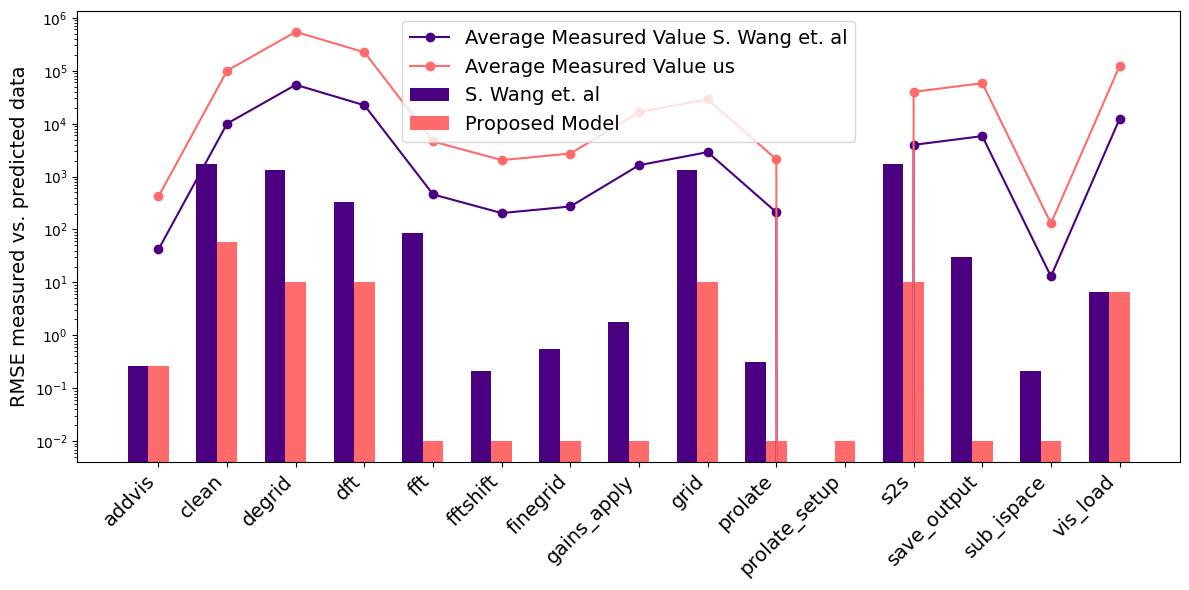

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Données de la SOTA
sota_labels = ["addvis", "clean", "degrid", "dft", "dgkernel", "fft", "fftshift", "finegrid", "gains_apply", "gkernel", "grid", "prolate", "prolate_setup", "s2s", "save_output", "sub_ispace", "vis_load"]
sota_rmse = [0.26, 1722.01, 1310.35, 328.79, None, 85.37, 0.21, 0.55, 1.81, None, 1311.53, 0.31, 0.0, 1729.34, 30.29, 0.21, 6.69]

# RMSE depuis une regression polynomial avec critère d'optimisation 
my_rmse = [0.26, 58, 10, 10, None, 0.01, 0.01, 0.01, 0.01, None, 10, 0.01, 0.01, 10, 0.01, 0.01, 6.69]

# Valeurs moyennes mesurées
average_measure_wang = [42, 9990, 53963, 22174, 58, 459, 204, 272, 1636, 53, 2890, 211, 0, 3961, 5794, 13, 12223]

average_measure_us = [420, 99900, 539630, 221740, 580, 4590, 2040, 2720, 16360, 530, 28900, 2110, 0, 39610, 57940, 130, 122230]

# Filtrer les valeurs valides
indices = [i for i, rmse in enumerate(sota_rmse) if rmse is not None]
labels = [sota_labels[i] for i in indices]
sota_valid = [sota_rmse[i] for i in indices]
my_valid = [my_rmse[i] for i in indices]
avg_valid_wang = [average_measure_wang[i] for i in indices]
avg_valid_us = [average_measure_us[i] for i in indices]

# Paramètres d'affichage
x = np.arange(len(labels))
thresh = 100  # Seuil de succès

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.3  # Largeur des barres

# Barres pour la SOTA
ax.bar(x - width, sota_valid, width, label='S. Wang et. al', color = '#4B0082')

# Barres pour ton algo
ax.bar(x, my_valid, width, label='Proposed Model',color = '#FF6B6B')

# Courbe des valeurs moyennes mesurées
ax.plot(x, avg_valid_wang, marker='o', linestyle='-', color='#4B0082', label='Average Measured Value S. Wang et. al')
ax.plot(x, avg_valid_us, marker='o', linestyle='-', color='#FF6B6B', label='Average Measured Value us')

# Labels et légende
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
ax.set_ylabel("RMSE measured vs. predicted data", fontsize=14)
#ax.set_title("Comparaison des RMSE entre la SOTA et mon algorithme avec valeurs moyennes")
ax.legend(fontsize=14)
ax.set_yscale('log')

# Enregistrer la figure en PNG
#fig.savefig("comparaison_rmse.png", format="png", dpi=300)

# Affichage
plt.tight_layout()
plt.show()


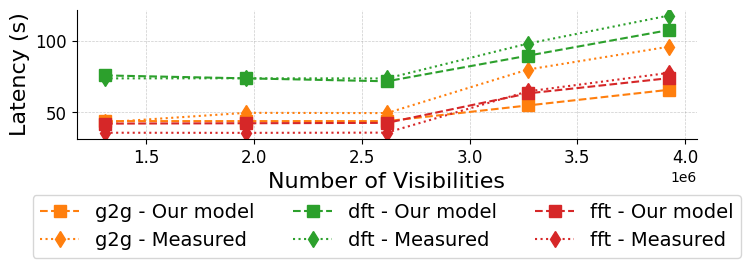

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
  #  "g2g_clean": {
  #      "sota": [86460., 100590., 114690., 143362.5, 172035.2],
  #      "simu": [44285., 54285., 64285., 75356.25, 86427.5],
  #      "measure": [53005.946, 69645.468, 89454.144, 97486.5, 116983.8]
  #  },
    "g2g": {
        "sota": [65840., 79970., 94070., 117587.5, 141105],
        "simu": [43840., 43840., 43840., 54800, 65760],
        "measure": [43005.946, 49645.468, 49454.144, 79959.5, 95951.4]
    },
    "dft": {
        "sota": [95148., 98548., 101963., 127453.75, 152944.5],
        "simu": [75848., 73793., 71733., 89666.25, 107599.5],
        "measure": [73767.191, 73845.297, 73718.304, 98139.39, 117767.27]
    },
    "fft": {
        "sota": [57623., 61553., 65493., 81866.25, 98239.5],
        "simu": [42083., 42343., 42603., 63253.75, 73904.5],
        "measure": [35700.461, 35607.163, 35769.942, 64674.34, 77609.21]
    }
}

# Fixer les paramètres
fixed_minor_cycle = 150
fixed_grid_size = 1536
#num_vis = np.array([1308160, 1962240, 2616320])
num_vis = np.array([1308160, 1962240, 2616320, 3270400, 3924480])

# Charger le fichier CSV
def load_simu_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')
    grid_sizes = sorted(df['GRID_SIZE'].unique())
    num_cycles = sorted(df['NUM_MINOR_CYCLES'].unique())
    num_visibilities = sorted(df['NUM_VISIBILITIES'].unique())
    latency = np.zeros(len(num_visibilities))
    for i, vis in enumerate(num_visibilities):
        latency[i] = df[(df['GRID_SIZE'] == grid_sizes[2]) & 
                        (df['NUM_MINOR_CYCLES'] == num_cycles[2]) & 
                        (df['NUM_VISIBILITIES'] == vis)]['DurationII'].values[0]
    return latency

def load_mes_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')
    df = df.sort_values(by=["NUM_VISIBILITIES", "NUM_MINOR_CYCLES", "GRID_SIZE"])
    num_visibilities = df["NUM_VISIBILITIES"].unique()
    num_cycles = df["NUM_MINOR_CYCLES"].unique()
    grid_sizes = df["GRID_SIZE"].unique()
    latency = np.zeros(len(num_visibilities))
    for i, vis in enumerate(num_visibilities):
        latency[i] = df[(df['GRID_SIZE'] == grid_sizes[2]) & 
                        (df['NUM_MINOR_CYCLES'] == num_cycles[2]) & 
                        (df['NUM_VISIBILITIES'] == vis)]['Latency'].values[0]
    return latency

# Création du plot
plt.figure(figsize=(8, 3))  

# Marqueurs et couleurs modernes pour chaque type de données
markers = {'sota': 'o', 'simu': 's', 'measure': 'd'}
colors = {'g2g_clean': '#1F77B4', 'g2g': '#FF7F0E', 'dft': '#2CA02C', 'fft': '#D62728'}  # Couleurs attrayantes et modernes

    
# Tracer les résultats extrapolés
for key in data.keys():
    simu_sota_data = [value / 1000 for value in data[key]["sota"]]
    simu_data = [value / 1000 for value in data[key]["simu"]]
    measure_data = [value / 1000 for value in data[key]["measure"]]
    
    # Tracer les résultats simulés
    plt.plot(num_vis, simu_data, label=f"{key} - Our model", marker=markers['simu'], linestyle='--', color=colors[key], markersize=8)
    
    # Tracer les résultats mesurés
    plt.plot(num_vis, measure_data, label=f"{key} - Measured", marker=markers['measure'], linestyle=':', color=colors[key], markersize=8)

# Configurer le plot avec des tailles de texte plus grandes pour une meilleure lisibilité
#plt.title(f"Latency vs. Number of Visibilities\n(NUM_MINOR_CYCLES = {fixed_minor_cycle}, GRID_SIZE = {fixed_grid_size})", fontsize=18)
plt.xlabel("Number of Visibilities", fontsize=16)
plt.ylabel("Latency (s)", fontsize=16)
#plt.legend(fontsize=22)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Supprimer les bords de la figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Augmenter la taille des chiffres sur les axes
plt.tick_params(axis='both', which='major', labelsize=12)

# Déplacer la légende à l'extérieur du graphique
plt.legend(fontsize=14, loc='lower center', bbox_to_anchor=(0.5, -1), ncol=len(extrapolated_data.keys()))
# Ajuster l’espace pour la légende
plt.subplots_adjust(bottom=0.45)

# Exporter le plot en PDF
#plt.tight_layout()  # Ajuster automatiquement les éléments pour éviter la coupure
#plt.savefig('latency_vs_visibilities.pdf', format='pdf')

# Afficher le plot
plt.show()



In [4]:

import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import plotly.io as pio 
import pandas as pd
from sklearn.metrics import mean_squared_error 

# Liste des fichiers CSV (simulation et mesure)
simulated_sota_csv_files = {
    "g2g_clean": "moldable/simu_sota/g2g_clean.csv",
    "g2g": "moldable/simu_sota/g2g.csv",
    "dft": "moldable/simu_sota/dft.csv",
    "fft": "moldable/simu_sota/fft.csv",
}
simulated_csv_files = {
    "g2g_clean": "moldable/simu/g2g_clean.csv",
    "g2g": "moldable/simu/g2g.csv",
    "dft": "moldable/simu/dft.csv",
    "fft": "moldable/simu/fft.csv",
}

measured_csv_files = {
    "g2g_clean": "moldable/measure/g2g_clean.csv",
    "g2g": "moldable/measure/g2g.csv",
    "dft": "moldable/measure/dft.csv",
    "fft": "moldable/measure/fft.csv",
}

instrumented = {
    "g2g_clean": 90154,
    "g2g": 90154,
    "dft": 97517,#valid
    "fft": 60122,#valid
}

# Données
num_minor_cycles = [50, 100, 150]
grid_size = np.array([512, 1024, 1536])
num_vis = np.array([1308160, 1962240, 2616320])

# Charger le fichier CSV
def load_simu_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')
    
    # Extraction des dimensions uniques
    grid_sizes = sorted(df['GRID_SIZE'].unique())
    num_cycles = sorted(df['NUM_MINOR_CYCLES'].unique())
    num_visibilities = sorted(df['NUM_VISIBILITIES'].unique())
    
    # Création d'un tableau numpy pour stocker les latences
    latency_simu = np.zeros((len(num_visibilities), len(num_cycles), len(grid_sizes)))
    
    # Remplissage du tableau
    for i, vis in enumerate(num_visibilities):
        for j, cycles in enumerate(num_cycles):
            for k, grid in enumerate(grid_sizes):
                value = df[(df['GRID_SIZE'] == grid) & (df['NUM_MINOR_CYCLES'] == cycles) & (df['NUM_VISIBILITIES'] == vis)]['DurationII'].values[0]
                latency_simu[i, j, k] = value
    
    return latency_simu

def load_mes_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')
    
    # Trier les données pour garantir un ordre cohérent
    df = df.sort_values(by=["NUM_VISIBILITIES", "NUM_MINOR_CYCLES", "GRID_SIZE"])
    
    # Obtenir les dimensions uniques
    visibilities = df["NUM_VISIBILITIES"].unique()
    minor_cycles = df["NUM_MINOR_CYCLES"].unique()
    grid_sizes = df["GRID_SIZE"].unique()

    # Construire un tableau numpy
    latency_measured = np.zeros((len(visibilities), len(minor_cycles), len(grid_sizes)))

    # Remplir le tableau
    for i, vis in enumerate(visibilities):
        for j, cycle in enumerate(minor_cycles):
            for k, grid in enumerate(grid_sizes):
                latency_measured[i, j, k] = df[(df["NUM_VISIBILITIES"] == vis) & 
                                                (df["NUM_MINOR_CYCLES"] == cycle) & 
                                                (df["GRID_SIZE"] == grid)]["Latency"].values[0]
    
    return latency_measured


def compute_rmse(simulated, measured):
    """ Calcule la RMSE entre les valeurs simulées et mesurées """
    simulated_flat = simulated.flatten() 
    measured_flat = measured.flatten()
    if len(simulated_flat)!= len(measured_flat):
        return 0
    return np.sqrt(mean_squared_error(simulated_flat, measured_flat))


def plot_3d_comparison(file_key,simu_sota_path, simu_path, measure_path, df_instrumented):

  latency_instru = np.full((len(grid_size), len(num_vis), len(num_minor_cycles)), df_instrumented)  
  #print("latency_instru: " + str(latency_instru))
  latency_simu_sota = load_simu_csv_to_numpy(simu_sota_path)
  #print("latency_simu_sota: " + str(latency_simu_sota))
  latency_simu = load_simu_csv_to_numpy(simu_path)
  #print("latency_simu: " + str(latency_simu))
  latency_measured = load_mes_csv_to_numpy(measure_path)
  #print("latency_measured: " + str(latency_measured))
  
  # Déterminer les min/max pour homogénéiser l'échelle des axes Z
  zmin = min(np.min(latency_instru), np.min(latency_simu_sota), np.min(latency_simu), np.min(latency_measured))
  zmax = max(np.max(latency_instru), np.max(latency_simu_sota), np.max(latency_simu), np.max(latency_measured))
  
  rmse_values = [compute_rmse(latency_instru,latency_measured), compute_rmse(latency_simu_sota,latency_measured), compute_rmse(latency_simu,latency_measured), compute_rmse(latency_measured,latency_measured)]
  error_values = [(rmse_values[0]/ np.mean(latency_measured))*100, (rmse_values[1]/ np.mean(latency_measured))*100, (rmse_values[2]/ np.mean(latency_measured))*100, (rmse_values[3]/ np.mean(latency_measured))*100]


  # Création des titres dynamiques
  subplot_titles = [
      f"Latency Instrumented<br>RMSE = {rmse_values[0]:.2f}<br>Error = {error_values[0]:.2f}%",
      f"Latency Simulated SOTA<br>RMSE = {rmse_values[1]:.2f}<br>Error = {error_values[1]:.2f}%",
      f"Latency Simulated<br>RMSE = {rmse_values[2]:.2f}<br>Error = {error_values[2]:.2f}%",
      f"Latency Measured<br>RMSE = {rmse_values[3]:.2f}<br>Error = {error_values[3]:.2f}%"
  ]

  # Création de la figure avec deux sous-graphiques côte à côte
  fig = make_subplots(
      rows=1, cols=4, 
      specs=[[{"type": "surface"}, {"type": "surface"}, {"type": "surface"}, {"type": "surface"}]], # Corrected specs
      subplot_titles=subplot_titles,
      horizontal_spacing=0.05
  )

  # Ajout des surfaces initiales
  fig.add_trace(go.Surface(
      x=grid_size, y=num_vis, z=latency_instru[0], 
      colorscale="Inferno", cmin=zmin, cmax=zmax
  ), row=1, col=1)

  fig.add_trace(go.Surface(
      x=grid_size, y=num_vis, z=latency_simu_sota[0], 
      colorscale="Inferno", cmin=zmin, cmax=zmax
  ), row=1, col=2)

  fig.add_trace(go.Surface(
      x=grid_size, y=num_vis, z=latency_simu[0], 
      colorscale="Inferno", cmin=zmin, cmax=zmax
  ), row=1, col=3)

  fig.add_trace(go.Surface(
      x=grid_size, y=num_vis, z=latency_measured[0], 
      colorscale="Inferno", cmin=zmin, cmax=zmax
  ), row=1, col=4
  )

  # Création des frames pour l'animation
  color = "Inferno"
  frames = []
  for i, cycle in enumerate(num_minor_cycles):
      frames.append(go.Frame(
          name=f"Cycle {cycle}",
          data=[
              go.Surface(z=latency_instru[i], x=grid_size, y=num_vis, colorscale=color, cmin=zmin, cmax=zmax),
              go.Surface(z=latency_simu_sota[i], x=grid_size, y=num_vis, colorscale=color, cmin=zmin, cmax=zmax),
              go.Surface(z=latency_simu[i], x=grid_size, y=num_vis, colorscale=color, cmin=zmin, cmax=zmax),
              go.Surface(z=latency_measured[i], x=grid_size, y=num_vis, colorscale=color, cmin=zmin, cmax=zmax)
          ]
      ))

  # Assign frames to the figure object directly
  fig.frames = frames

  # Ajout du slider
  sliders = [{
      "active": 0,
      "yanchor": "top",
      "xanchor": "left",
      "currentvalue": {"prefix": "Cycle: ", "font": {"size": 20}},
      "pad": {"b": 10, "t": 50},
      "len": 0.9,
      "x": 0.1,
      "y": 0,
      "steps": [
          {"args": [[f"Cycle {t}"], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
          "label": str(t), "method": "animate"} for t in num_minor_cycles
      ]
  }]

  # Mise à jour du layout (remove frames from here)
  fig.update_layout(
      annotations=[dict(font=dict(size=10))],
      title=file_key,
      width=1600,  # Ajuste la largeur pour éviter le chevauchement
      height=400,  # Ajuste la hauteur
      margin=dict(l=0, r=0, t=100, b=40),  # Réduit les marges 
      scene=dict(xaxis_title="Grid Size", yaxis_title="Num Vis", zaxis_title="Latency", zaxis=dict(range=[zmin, zmax])),
      scene2=dict(xaxis_title="Grid Size", yaxis_title="Num Vis", zaxis_title="Latency", zaxis=dict(range=[zmin, zmax])),
      scene3=dict(xaxis_title="Grid Size", yaxis_title="Num Vis", zaxis_title="Latency", zaxis=dict(range=[zmin, zmax])),
      scene4=dict(xaxis_title="Grid Size", yaxis_title="Num Vis", zaxis_title="Latency", zaxis=dict(range=[zmin, zmax])),
      sliders=sliders
  )

  # Sauvegarde du premier frame en PDF
  #pio.write_image(fig, f"3D_comparison_{file_key}.pdf", format="pdf", engine="kaleido") # Use write_image instead
  #print(f"Graphique enregistré : 3D_comparison_{file_key}.pdf")
  
  # Sauvegarde du premier frame en png
  #pio.write_image(fig, f"3D_comparison_{file_key}.png", format="png", engine="kaleido") # Use write_image instead
  #print(f"Graphique enregistré : 3D_comparison_{file_key}.png")

  # Sauvegarde de l'animation complète en HTML
  #fig.write_html(f"3D_comparison_{file_key}.html")
  #print(f"Animation enregistrée : 3D_comparison_{file_key}.html")

  # Affichage
  pio.renderers.default = "browser"  # ou "svg", "png", "notebook_connected", etc.

  fig.show()

# Boucle sur chaque fichier pour comparer simulations et mesures
for key in simulated_csv_files.keys():
    plot_3d_comparison(key, simulated_sota_csv_files[key], simulated_csv_files[key], measured_csv_files[key],instrumented[key])

[528804, Main Thread] WARNING: GTK+ module /snap/firefox/6042/gnome-platform/usr/lib/gtk-2.0/modules/libcanberra-gtk-module.so cannot be loaded.
GTK+ 2.x symbols detected. Using GTK+ 2.x and GTK+ 3 in the same process is not supported.: 'glib warning', file /build/firefox/parts/firefox/build/toolkit/xre/nsSigHandlers.cpp:201

(firefox_firefox:528804): Gtk-WARNING **: 16:26:06.540: GTK+ module /snap/firefox/6042/gnome-platform/usr/lib/gtk-2.0/modules/libcanberra-gtk-module.so cannot be loaded.
GTK+ 2.x symbols detected. Using GTK+ 2.x and GTK+ 3 in the same process is not supported.
Gtk-Message: 16:26:06.540: Failed to load module "canberra-gtk-module"
[528804, Main Thread] WARNING: GTK+ module /snap/firefox/6042/gnome-platform/usr/lib/gtk-2.0/modules/libcanberra-gtk-module.so cannot be loaded.
GTK+ 2.x symbols detected. Using GTK+ 2.x and GTK+ 3 in the same process is not supported.: 'glib warning', file /build/firefox/parts/firefox/build/toolkit/xre/nsSigHandlers.cpp:201

(firefox_fir

In [20]:
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import plotly.io as pio
import pandas as pd

# Fichiers à afficher côte à côte
simulated_sota_csv_files = {
    "dft": "moldable/simu_sota/fft.csv",
    "fft": "moldable/simu_sota/fft.csv",
}

# Fonction pour charger les données depuis un CSV
def load_simu_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')
    
    # Extraire les valeurs uniques pour les paramètres
    grid_sizes = sorted(df['GRID_SIZE'].unique())
    num_cycles = sorted(df['NUM_MINOR_CYCLES'].unique())
    num_visibilities = sorted(df['NUM_VISIBILITIES'].unique())

    latency_simu = np.zeros((len(num_visibilities), len(num_cycles), len(grid_sizes)))

    # Remplir la matrice des latences simulées
    for i, vis in enumerate(num_visibilities):
        for j, cycles in enumerate(num_cycles):
            for k, grid in enumerate(grid_sizes):
                value = df[(df['GRID_SIZE'] == grid) & (df['NUM_MINOR_CYCLES'] == cycles) & (df['NUM_VISIBILITIES'] == vis)]['DurationII'].values[0]
                latency_simu[i, j, k] = value

    return latency_simu, grid_sizes, num_cycles, num_visibilities

# Charger les données
simu_data = {}
grid_sizes = num_cycles = num_visibilities = None

for key, path in simulated_sota_csv_files.items():
    latency_simu, gs, nc, nv = load_simu_csv_to_numpy(path)
    simu_data[key] = latency_simu
    grid_sizes = gs  # Ne pas réécrire, conserver les valeurs
    num_cycles = nc
    num_visibilities = nv

# Déterminer l’échelle Z commune
zmin = min(np.min(latency) for latency in simu_data.values())
zmax = max(np.max(latency) for latency in simu_data.values())

# Déterminer les bornes fixes des axes
x_range = [0, len(grid_sizes)-1]  # Plage basée sur les indices
y_range = [0, len(num_visibilities)-1]  # Plage basée sur les indices
z_range = [zmin, zmax]

# Créer la figure avec deux colonnes pour les surfaces
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "surface"}, {"type": "surface"}]],
    subplot_titles=[f"{key.upper()}" for key in simulated_sota_csv_files]
)

# Fonction utilitaire pour les surfaces
def make_surface(z, col, grid_size, num_vis):
    return go.Surface(
        z=z,
        x=np.arange(len(grid_size)),  # Utiliser les indices pour les axes x
        y=np.arange(len(num_vis)),  # Utiliser les indices pour les axes y
        colorscale="Inferno", cmin=zmin, cmax=zmax,
        showscale=(col == 2),  # Afficher la légende uniquement pour le deuxième subplot
        colorbar=dict(title="Latency (ms)", len=0.75) if col == 2 else None
    )

# Surface initiale (cycle 50)
for col, (key, latency_simu) in enumerate(simu_data.items(), start=1):
    fig.add_trace(make_surface(latency_simu[0, :, :], col, grid_sizes, num_visibilities), row=1, col=col)

# Frames
frames = []
for i, cycle in enumerate(num_cycles):
    frame_data = [
        make_surface(simu_data[key][i, :, :], col, grid_sizes, num_visibilities) 
        for col, (key, latency_simu) in enumerate(simu_data.items(), start=1)
    ]
    frames.append(go.Frame(data=frame_data, name=f"Cycle {cycle}"))
fig.frames = frames

# Curseur
sliders = [{
    "steps": [
        {
            "args": [[f"Cycle {cycle}"], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
            "label": str(cycle),
            "method": "animate"
        } for cycle in num_cycles
    ],
    "transition": {"duration": 300},
    "x": 0.1, "xanchor": "left",
    "y": -0.05, "yanchor": "top",
    "len": 0.8,
    "currentvalue": {"prefix": "Minor Cycles: ", "font": {"size": 18}}
}]

# Vérification des latences nulles ou négatives
if np.any(latency_simu <= 0):
    print(f"Attention : certaines valeurs de latence sont nulles ou négatives.")

# Définir un zmin qui n'est pas trop proche de zéro
zmin = max(zmin, 1e-3)

# Layout général avec bornes et titres fixes
fig.update_layout(
    title="Latence simulée - Comparaison DFT (animée selon le nombre de cycles)",
    width=1800, height=700,
    margin=dict(t=100, b=80),
    sliders=sliders,
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}]},
            {"label": "Pause", "method": "animate", "args": [[None], {"frame": {"duration": 0}, "mode": "immediate"}]}
        ],
        "x": 0.1, "y": -0.15,
        "direction": "left"
    }]
)

# Uniformiser les axes de chaque subplot
fig.update_scenes(
    dict(
        xaxis=dict(title="Grid Size", tickvals=np.arange(len(grid_sizes)), ticktext=grid_sizes),
        yaxis=dict(title="Number of Visibilities", tickvals=np.arange(len(num_visibilities)), ticktext=num_visibilities),
        zaxis=dict(title="Latency (ms)", range=z_range, type="log"),
    ),
    row=1, col=1
)

fig.update_scenes(
    dict(
        xaxis=dict(title="Grid Size", tickvals=np.arange(len(grid_sizes)), ticktext=grid_sizes),
        yaxis=dict(title="Number of Visibilities", tickvals=np.arange(len(num_visibilities)), ticktext=num_visibilities),
        zaxis=dict(title="Latency (ms)", range=z_range, type="log"),
    ),
    row=1, col=2
)

# Affichage
pio.renderers.default = "browser"
fig.show()


Gtk-Message: 15:51:30.064: Not loading module "atk-bridge": The functionality is provided by GTK natively. Please try to not load it.


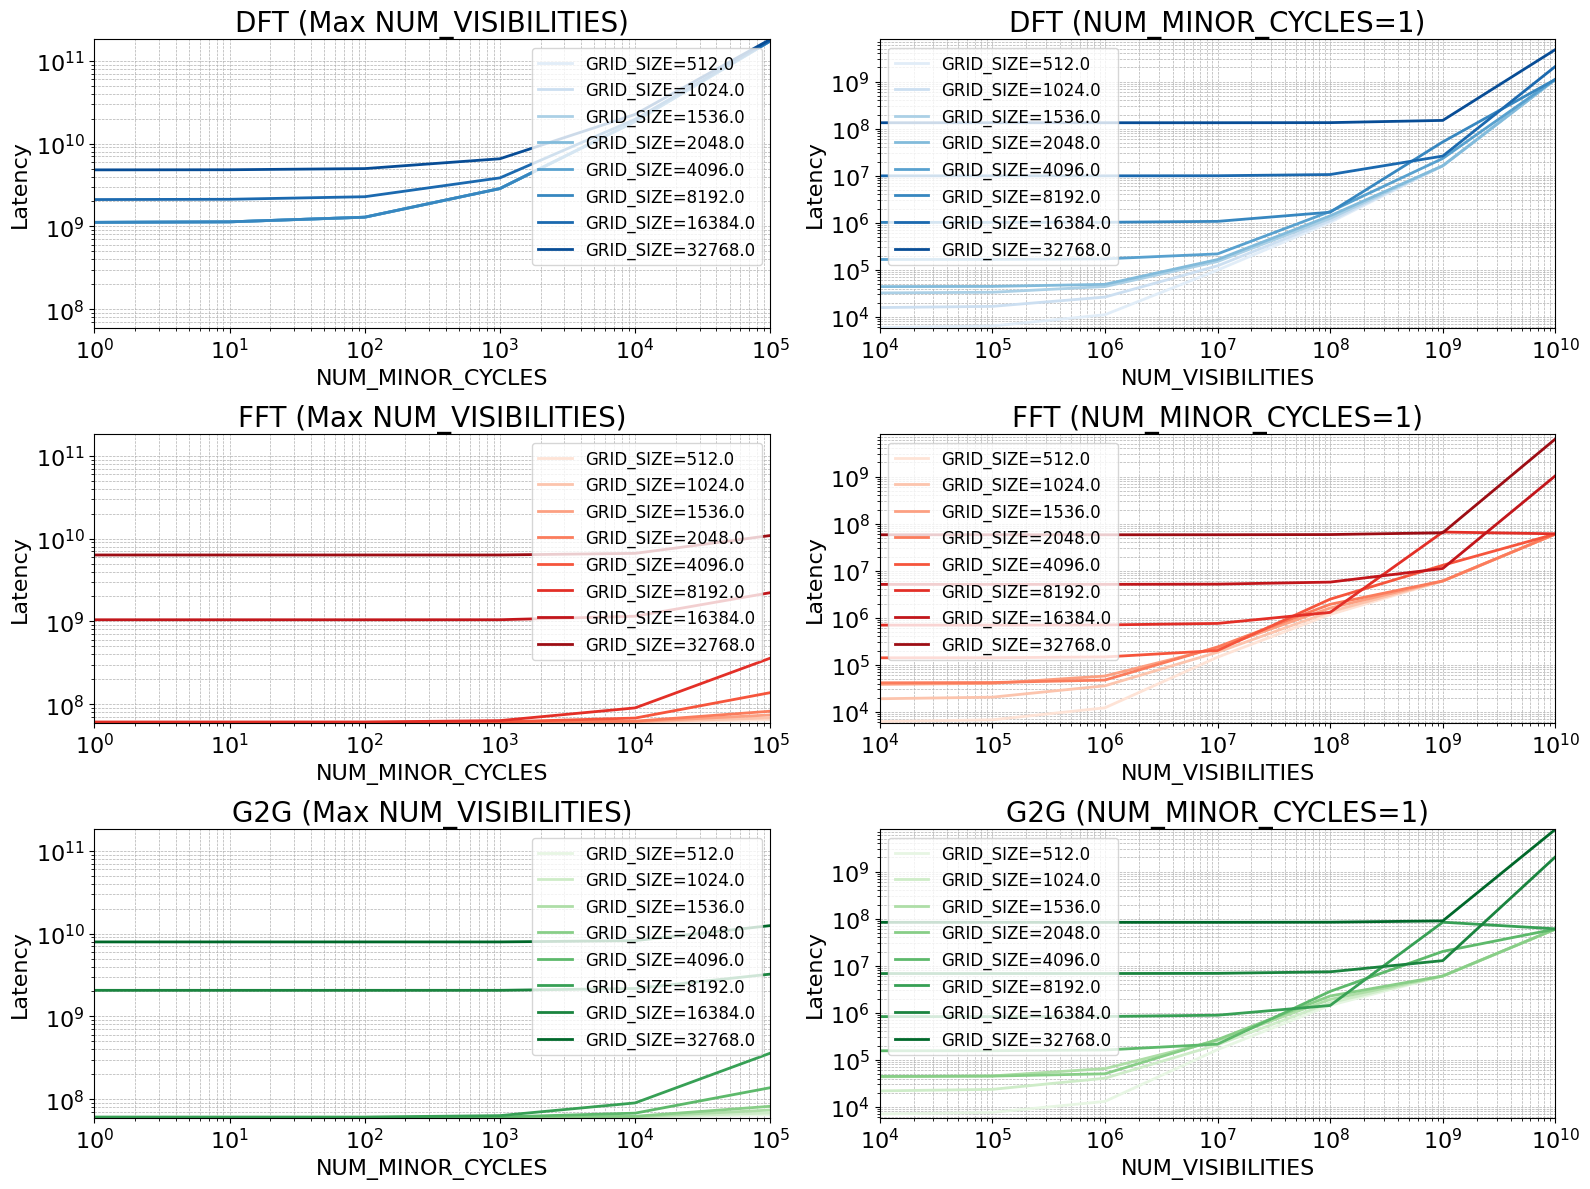

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Fichiers à afficher côte à côte
simulated_sota_csv_files = {
    "dft": "moldable/simu_sota/dft.csv",
    "fft": "moldable/simu_sota/fft.csv",
    "g2g": "moldable/simu_sota/g2g.csv",
}

# Fonction pour charger les données depuis un CSV
def load_simu_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')

    # Extraire les valeurs uniques pour les paramètres
    grid_sizes = sorted(df['GRID_SIZE'].unique())
    num_cycles = sorted(df['NUM_MINOR_CYCLES'].unique())
    num_visibilities = sorted(df['NUM_VISIBILITIES'].unique())

    latency_simu = np.zeros((len(num_visibilities), len(num_cycles), len(grid_sizes)))

    # Remplir la matrice des latences simulées
    for i, vis in enumerate(num_visibilities):
        for j, cycles in enumerate(num_cycles):
            for k, grid in enumerate(grid_sizes):
                value = df[(df['GRID_SIZE'] == grid) & (df['NUM_MINOR_CYCLES'] == cycles) & (df['NUM_VISIBILITIES'] == vis)]['DurationII'].values[0]
                latency_simu[i, j, k] = value

    return latency_simu, grid_sizes, num_cycles, num_visibilities

# Fonction pour tracer les graphiques
def plot_simu_data(simulated_sota_csv_files):
    plt.style.use('default')  # Utiliser le style par défaut pour plus de simplicité
    num_files = len(simulated_sota_csv_files)
    fig, axes = plt.subplots(num_files, 2, figsize=(16, 4 * num_files))

    all_cycles = []
    all_visibilities = []
    all_durations_cycles = []
    all_durations_vis = []

    # D'abord : on charge tout pour calculer les bornes globales
    data_loaded = []
    for name, file_path in simulated_sota_csv_files.items():
        latency_simu, grid_sizes, num_cycles, num_visibilities = load_simu_csv_to_numpy(file_path)
        data_loaded.append((name, latency_simu, grid_sizes, num_cycles, num_visibilities))

        all_cycles.extend(num_cycles)
        all_visibilities.extend(num_visibilities)

        for k in range(len(grid_sizes)):
            all_durations_cycles.extend(latency_simu[-1, :, k])
            all_durations_vis.extend(latency_simu[:, 0, k])

    # Définir les bornes globales des axes
    xlim_cycles = (min(all_cycles), max(all_cycles))
    ylim_cycles = (min(all_durations_cycles), max(all_durations_cycles))

    xlim_vis = (min(all_visibilities), max(all_visibilities))
    ylim_vis = (min(all_durations_vis), max(all_durations_vis))
    
    # Palettes spécifiques par algorithme
    custom_colormaps = {
        "dft": cm.Blues,
        "fft": cm.Reds,
        "g2g": cm.Greens
    }


    # Ensuite : on trace avec les mêmes limites pour tous
    #palette = plt.get_cmap('viridis')  # Utiliser une palette de couleurs plus moderne

    for idx, (name, latency_simu, grid_sizes, num_cycles, num_visibilities) in enumerate(data_loaded):
        # DurationII vs NUM_MINOR_CYCLES
        for k, grid_size in enumerate(grid_sizes):
            axes[idx, 0].plot(num_cycles, latency_simu[-1, :, k], label=f'GRID_SIZE={grid_size}', linewidth=2, color=custom_colormaps[name]((k + 1) / (len(grid_sizes) + 1)))#color=palette(k / len(grid_sizes))
            axes[idx, 0].set_xlabel('NUM_MINOR_CYCLES', fontsize=16)
            axes[idx, 0].set_ylabel('Latency', fontsize=16)
            axes[idx, 0].set_title(f'{name.upper()} (Max NUM_VISIBILITIES)', fontsize=20)
            axes[idx, 0].set_xscale('log')
            axes[idx, 0].set_yscale('log')
            axes[idx, 0].set_xlim(xlim_cycles)
            axes[idx, 0].set_ylim(ylim_cycles)
            axes[idx, 0].legend(fontsize=12)
            axes[idx, 0].grid(True, which="both", ls="--", linewidth=0.5)
            axes[idx, 0].tick_params(axis='both', which='major', labelsize=16)  # Augmenter la taille des chiffres sur les axes

        # DurationII vs NUM_VISIBILITIES
        for k, grid_size in enumerate(grid_sizes):
            axes[idx, 1].plot(num_visibilities, latency_simu[:, 0, k], label=f'GRID_SIZE={grid_size}', linewidth=2, color=custom_colormaps[name]((k + 1) / (len(grid_sizes) + 1)))
            axes[idx, 1].set_xlabel('NUM_VISIBILITIES', fontsize=16)
            axes[idx, 1].set_ylabel('Latency', fontsize=16)
            axes[idx, 1].set_title(f'{name.upper()} (NUM_MINOR_CYCLES=1)', fontsize=20)
            axes[idx, 1].set_xscale('log')
            axes[idx, 1].set_yscale('log')
            axes[idx, 1].set_xlim(xlim_vis)
            axes[idx, 1].set_ylim(ylim_vis)
            axes[idx, 1].legend(fontsize=12)
            axes[idx, 1].grid(True, which="both", ls="--", linewidth=0.5)
            axes[idx, 1].tick_params(axis='both', which='major', labelsize=16)  # Augmenter la taille des chiffres sur les axes

    plt.tight_layout()
    plt.show()

# Tracer les données
plot_simu_data(simulated_sota_csv_files)


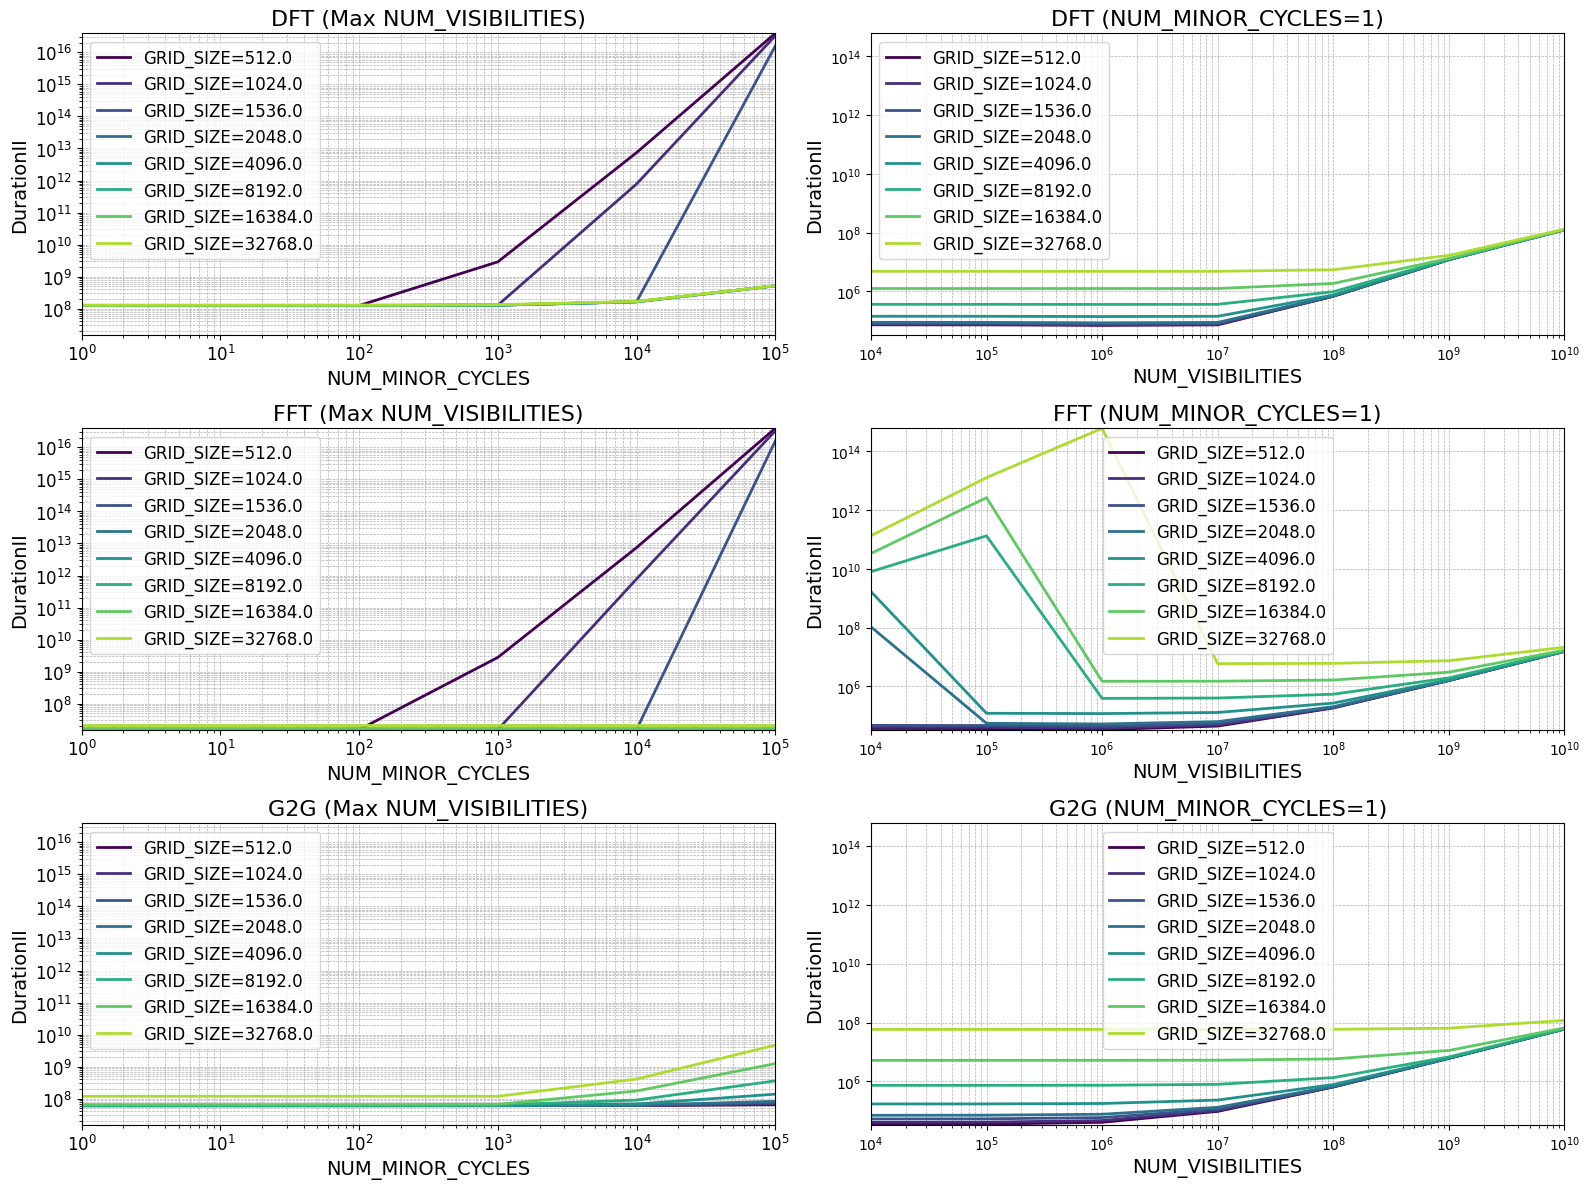

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fichiers à afficher côte à côte
simulated_sota_csv_files = {
    "dft": "moldable/simu/dft.csv",
    "fft": "moldable/simu/fft.csv",
    "g2g": "moldable/simu_sota/fft.csv",
}

# Fonction pour charger les données depuis un CSV
def load_simu_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')

    # Extraire les valeurs uniques pour les paramètres
    grid_sizes = sorted(df['GRID_SIZE'].unique())
    num_cycles = sorted(df['NUM_MINOR_CYCLES'].unique())
    num_visibilities = sorted(df['NUM_VISIBILITIES'].unique())

    latency_simu = np.zeros((len(num_visibilities), len(num_cycles), len(grid_sizes)))

    # Remplir la matrice des latences simulées
    for i, vis in enumerate(num_visibilities):
        for j, cycles in enumerate(num_cycles):
            for k, grid in enumerate(grid_sizes):
                value = df[(df['GRID_SIZE'] == grid) & (df['NUM_MINOR_CYCLES'] == cycles) & (df['NUM_VISIBILITIES'] == vis)]['DurationII'].values[0]
                latency_simu[i, j, k] = value

    return latency_simu, grid_sizes, num_cycles, num_visibilities

# Fonction pour tracer les graphiques
def plot_simu_data(simulated_sota_csv_files):
    plt.style.use('default')  # Utiliser le style par défaut pour plus de simplicité
    num_files = len(simulated_sota_csv_files)
    fig, axes = plt.subplots(num_files, 2, figsize=(16, 4 * num_files))

    all_cycles = []
    all_visibilities = []
    all_durations_cycles = []
    all_durations_vis = []

    # D'abord : on charge tout pour calculer les bornes globales
    data_loaded = []
    for name, file_path in simulated_sota_csv_files.items():
        latency_simu, grid_sizes, num_cycles, num_visibilities = load_simu_csv_to_numpy(file_path)
        data_loaded.append((name, latency_simu, grid_sizes, num_cycles, num_visibilities))

        all_cycles.extend(num_cycles)
        all_visibilities.extend(num_visibilities)

        for k in range(len(grid_sizes)):
            all_durations_cycles.extend(latency_simu[-1, :, k])
            all_durations_vis.extend(latency_simu[:, 0, k])

    # Définir les bornes globales des axes
    xlim_cycles = (min(all_cycles), max(all_cycles))
    ylim_cycles = (min(all_durations_cycles), max(all_durations_cycles))

    xlim_vis = (min(all_visibilities), max(all_visibilities))
    ylim_vis = (min(all_durations_vis), max(all_durations_vis))

    name_to_color = {
    "dft": "blue",
    "fft": "red",
    "g2g": "green"
    }

    # Ensuite : on trace avec les mêmes limites pour tous
    #palette = plt.get_cmap('viridis')  # Utiliser une palette de couleurs plus moderne

    for idx, (name, latency_simu, grid_sizes, num_cycles, num_visibilities) in enumerate(data_loaded):
        # DurationII vs NUM_MINOR_CYCLES
        for k, grid_size in enumerate(grid_sizes):
            axes[idx, 0].plot(num_cycles, latency_simu[-1, :, k], label=f'GRID_SIZE={grid_size}', linewidth=2, color=palette(k / len(grid_sizes)))
        axes[idx, 0].set_xlabel('NUM_MINOR_CYCLES', fontsize=14)
        axes[idx, 0].set_ylabel('Latency', fontsize=14)
        axes[idx, 0].set_title(f'{name.upper()} (Max NUM_VISIBILITIES)', fontsize=16)
        axes[idx, 0].set_xscale('log')
        axes[idx, 0].set_yscale('log')
        axes[idx, 0].set_xlim(xlim_cycles)
        axes[idx, 0].set_ylim(ylim_cycles)
        axes[idx, 0].legend(fontsize=12)
        axes[idx, 0].grid(True, which="both", ls="--", linewidth=0.5)
        axes[idx, 0].tick_params(axis='both', which='major', labelsize=12)  # Augmenter la taille des chiffres sur les axes

        # DurationII vs NUM_VISIBILITIES
        for k, grid_size in enumerate(grid_sizes):
            axes[idx, 1].plot(num_visibilities, latency_simu[:, 0, k], label=f'GRID_SIZE={grid_size}', linewidth=2, color=palette(k / len(grid_sizes)))
        axes[idx, 1].set_xlabel('NUM_VISIBILITIES', fontsize=14)
        axes[idx, 1].set_ylabel('Latency', fontsize=14)
        axes[idx, 1].set_title(f'{name.upper()} (NUM_MINOR_CYCLES=1)', fontsize=16)
        axes[idx, 1].set_xscale('log')
        axes[idx, 1].set_yscale('log')
        axes[idx, 1].set_xlim(xlim_vis)
        axes[idx, 1].set_ylim(ylim_vis)
        axes[idx, 1].legend(fontsize=12)
        axes[idx, 1].grid(True, which="both", ls="--", linewidth=0.5)
        axes[idx, 1].tick_params(axis='both', which='major', labelsize=12)  # Augmenter la taille des chiffres sur les axes

    plt.tight_layout()
    plt.show()

# Tracer les données
plot_simu_data(simulated_sota_csv_files)


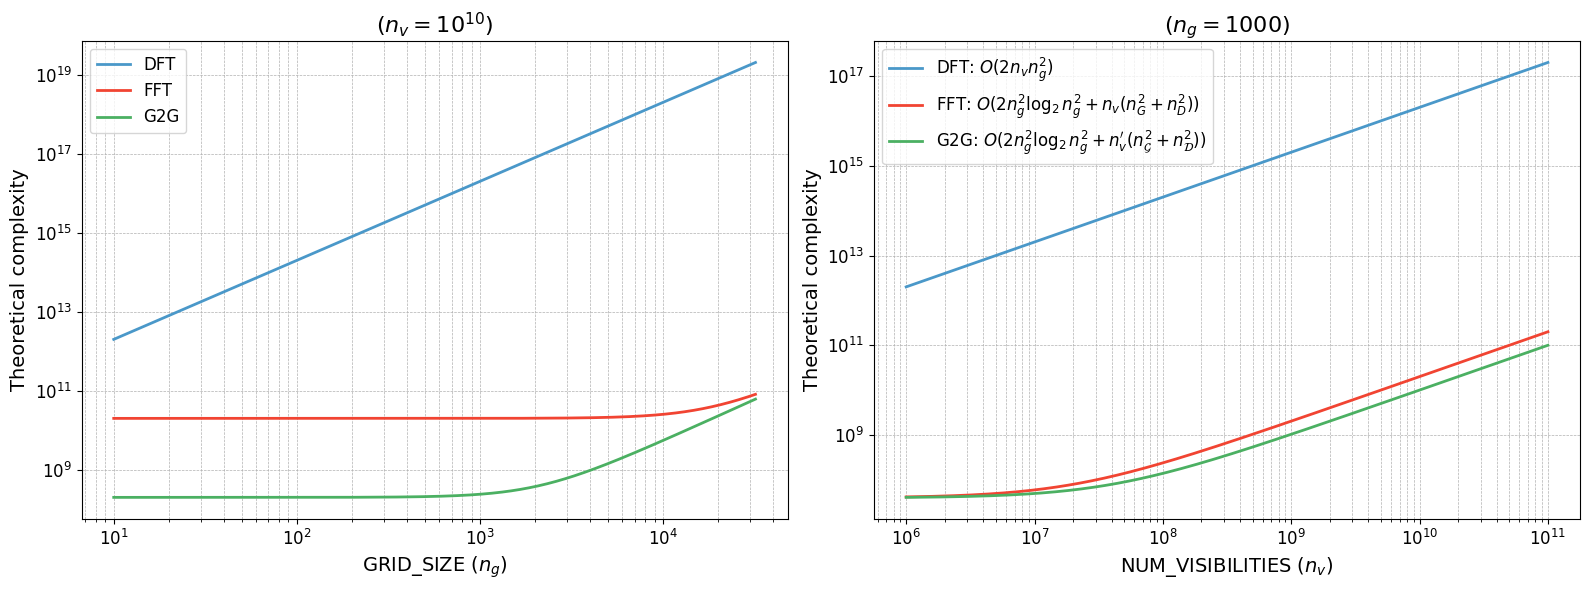

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Données
n_g = np.logspace(1, np.log10(32000), 500)  # Taille de la grille de 10 à 32,000
n_v_values = np.logspace(6, 11, 500)        # Nombre de visibilités de 1e6 à 1e11

# Constantes
n_G = 1
n_D = 1
n_v_prime = 10**8  # Valeur fixe pour G2G

# Couleurs (cohérentes avec l'autre script)
colors = {
    'DFT': cm.Blues(0.6),
    'FFT': cm.Reds(0.6),
    'G2G': cm.Greens(0.6)
}

plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphe gauche : complexité en fonction de la taille de grille
n_v_fixed = 10**10
DFT_g = 2 * n_v_fixed * n_g**2
FFT_g = 2 * n_g**2 * np.log2(n_g**2) + n_v_fixed * (n_G**2 + n_D**2)
G2G_g = 2 * n_g**2 * np.log2(n_g**2) + n_v_prime * (n_G**2 + n_D**2)

axes[0].plot(n_g, DFT_g, label='DFT', color=colors['DFT'], linewidth=2)
axes[0].plot(n_g, FFT_g, label='FFT', color=colors['FFT'], linewidth=2)
axes[0].plot(n_g, G2G_g, label='G2G', color=colors['G2G'], linewidth=2)
axes[0].set_xlabel('GRID_SIZE ($n_g$)', fontsize=14)
axes[0].set_ylabel('Theoretical complexity', fontsize=14)
axes[0].set_title('($n_v = 10^{10}$)', fontsize=16)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].grid(True, which="both", ls="--", linewidth=0.5)
axes[0].legend(fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Graphe droite : complexité en fonction du nombre de visibilités
n_g_fixed = 1000
DFT_v = 2 * n_v_values * n_g_fixed**2
FFT_v = 2 * n_g_fixed**2 * np.log2(n_g_fixed**2) + n_v_values * (n_G**2 + n_D**2)
G2G_v = 2 * n_g_fixed**2 * np.log2(n_g_fixed**2) + n_v_values * (n_G**2 + n_D**2 * 0)  # Même complexité visibilités

axes[1].plot(n_v_values, DFT_v, label='DFT: $O(2n_v n_g^2)$', color=colors['DFT'], linewidth=2)
axes[1].plot(n_v_values, FFT_v, label='FFT: $O(2n_g^2 \\log_2 n_g^2 + n_v (n_G^2 + n_D^2))$', color=colors['FFT'], linewidth=2)
axes[1].plot(n_v_values, G2G_v, label="G2G: $O(2n_g^2 \\log_2 n_g^2 + n_v' (n_{\\mathcal{G}}^2 + n_{\\mathcal{D}}^2))$", color=colors['G2G'], linewidth=2)
axes[1].set_xlabel('NUM_VISIBILITIES ($n_v$)', fontsize=14)
axes[1].set_ylabel('Theoretical complexity', fontsize=14)
axes[1].set_title('($n_g = 1000$)', fontsize=16)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].grid(True, which="both", ls="--", linewidth=0.5)
axes[1].legend(fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()
